In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap

In [9]:
# Define the loss function
def loss_function(x, y):
    return 0.1 * x**2 + 5 * y**2

# Compute gradients
def gradients(x, y):
    return 0.2*x, 10*y

In [10]:
def gradient_descent(lr, steps, x_start, y_start):
    x, y = x_start, y_start
    path = [(x, y)]
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        x -= lr * grad_x
        y -= lr * grad_y
        path.append((x, y))
    return np.array(path)

In [11]:
def adagrad(lr, steps, x_start, y_start, epsilon=1e-8):
    x, y = x_start, y_start
    path = [(x, y)]
    grad_sq_x, grad_sq_y = 0, 0
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        grad_sq_x += grad_x**2
        grad_sq_y += grad_y**2
        x -= (lr / (np.sqrt(grad_sq_x) + epsilon)) * grad_x
        y -= (lr / (np.sqrt(grad_sq_y) + epsilon)) * grad_y
        path.append((x, y))
    return np.array(path)

In [12]:
def rmsprop(lr, steps, x_start, y_start, beta=0.9, epsilon=1e-8):
    x, y = x_start, y_start
    path = [(x, y)]
    v_x, v_y = 0, 0
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        v_x = beta * v_x + (1 - beta) * grad_x**2
        v_y = beta * v_y + (1 - beta) * grad_y**2
        x -= (lr / (np.sqrt(v_x) + epsilon)) * grad_x
        y -= (lr / (np.sqrt(v_y) + epsilon)) * grad_y
        path.append((x, y))
    return np.array(path)

In [13]:
def adam(lr, steps, x_start, y_start, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x, y = x_start, y_start
    path = [(x, y)]
    m_x, m_y, v_x, v_y = 0, 0, 0, 0
    for t in range(1, steps + 1):
        grad_x, grad_y = gradients(x, y)
        m_x = beta1 * m_x + (1 - beta1) * grad_x
        m_y = beta1 * m_y + (1 - beta1) * grad_y
        v_x = beta2 * v_x + (1 - beta2) * grad_x**2
        v_y = beta2 * v_y + (1 - beta2) * grad_y**2

        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)
        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)

        x -= (lr / (np.sqrt(v_x_hat) + epsilon)) * m_x_hat
        y -= (lr / (np.sqrt(v_y_hat) + epsilon)) * m_y_hat
        path.append((x, y))
    return np.array(path)

In [15]:
# parameters
learning_rate = 0.1
steps = 500
x_start, y_start = -1.5, -1  # Initial point

# paths
gd_path = gradient_descent(learning_rate, steps, x_start, y_start)
adagrad_path = adagrad(learning_rate, steps, x_start, y_start)
rmsprop_path = rmsprop(learning_rate, steps, x_start, y_start)
adam_path = adam(learning_rate, steps, x_start, y_start)

In [16]:
# loss surface
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_function(X, Y)

In [17]:
# Color Setup
colors = ["#ff9999", "#ffffff", "blue"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

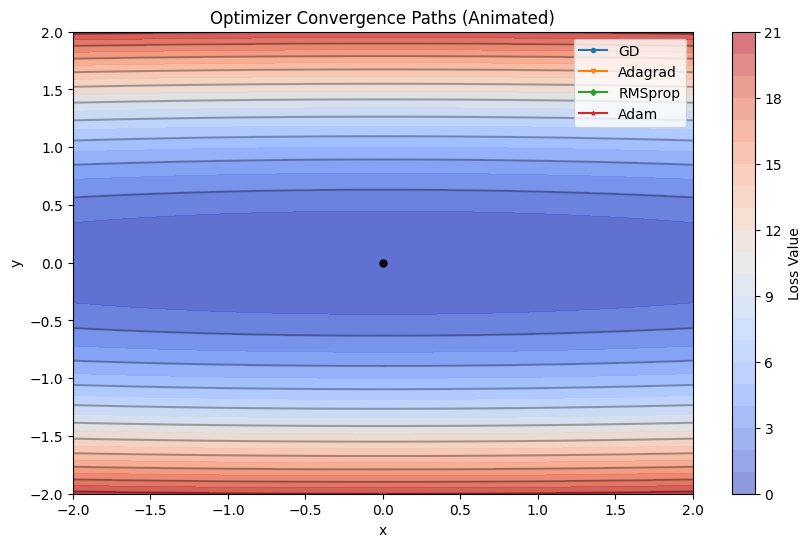

In [19]:
# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.contourf(X, Y, Z, levels=20, cmap='coolwarm', alpha=0.6)
cbar = fig.colorbar(ax.contourf(X, Y, Z, levels=20, cmap='coolwarm', alpha=0.6), ax=ax)
cbar.set_label("Loss Value")
ax.contour(X, Y, Z, levels=10, colors="black", alpha=0.3)

# Plot a dot at 0,0
ax.plot(0, 0, marker="o", markersize=5, color="black")

# Initialize plots for different optimizers
lines = {
    "Gradient Descent": ax.plot([], [], marker="o", markersize=3, label="GD")[0],
    "Adagrad": ax.plot([], [], marker="v", markersize=3, label="Adagrad")[0],
    "RMSprop": ax.plot([], [], marker="D", markersize=3, label="RMSprop")[0],
    "Adam": ax.plot([], [], marker="*", markersize=3, label="Adam")[0],
}

paths = {
    "Gradient Descent": gd_path,
    "Adagrad": adagrad_path,
    "RMSprop": rmsprop_path,
    "Adam": adam_path,
}

def update(frame):
    for name, line in lines.items():
        path = paths[name]
        line.set_data(path[:frame, 0], path[:frame, 1])
    return list(lines.values())


anim = animation.FuncAnimation(fig, update, frames=steps, interval=50)
# Labels and legend
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Optimizer Convergence Paths (Animated)")
ax.legend()

anim.save("Optimizer_Convergence_paths.mp4")
# anim